Having completed Chapter 3 of "An Introduction to Statistical Learning" which covers linear regression, I wanted to perform a basic multiple linear regression on the Boston data set with MEDV as my response. For this excercise I will attempt to answer the following questions about my model:

- Is there a relationship between our response and predictors?
- How strong is the relationship?
- Which predictors contribute to the response?
- How large is the effect of each predictor on the response?
- How accurately can we predict future responses?
- Is the relationship linear?
- Is there synergy among the predictors?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sns.set_style(style='whitegrid')

In [51]:
from sklearn.datasets import load_boston
from sklearn import metrics

In [9]:
boston = load_boston()

In [12]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [14]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [19]:
boston_df = pd.DataFrame(data=boston['data'],columns=boston['feature_names'])

In [20]:
boston_df['MEDV'] = boston['target']

In [21]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 1 - Is there a relationship between our response and predictors?

This is answered by fitting a multiple linear regression model and testing the null hypothesis; H0 : B1 = B2 = Bp = 0
The F-statistic can be used to determine whether or not we reject the null hypothesis by observing the resulting p-value.

In [26]:
#Step 1 - Make the linear regression model Y = B0 + B1X1 + ... + BpXp + ϵ

X = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1]

In [29]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 50)

In [69]:
#Sci Kit Learn doesn't seem to have a way of computing the F-statistic, leveraging statsmodels for this

In [55]:
import statsmodels.api as sm
from scipy import stats

In [59]:
beta0 = sm.add_constant(X_train)

In [64]:
model = sm.OLS(y_train, beta0).fit()

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     87.75
Date:                Fri, 09 Nov 2018   Prob (F-statistic):          4.00e-100
Time:                        18:00:45   Log-Likelihood:                -1010.0
No. Observations:                 354   AIC:                             2048.
Df Residuals:                     340   BIC:                             2102.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.5138      5.854      4.358      0.000      14.000      37.028
CRIM          -0.1007      0.034     -2.970      0.003      -0.167      -0.034
ZN             0.0310      0.014      2.150      0.032       0.003       0.059
INDUS          0.0149      0.071      0.210      0.834      -0.125       0.154
CHAS           1.6633      1.045      1.591      0.112      -0.393       3.719
NOX          -15.9064      4.207     -3.781      0.000     -24.182      -7.631
RM             5.0252      0.485     10.365      0.000       4.072       5.979
AGE           -0.0006      0.014     -0.046      0.964      -0.028       0.027
DIS           -1.3134      0.216     -6.092      0.000      -1.737      -0.889
RAD            0.2552      0.070      3.634      0.000       0.117       0.393
TAX           -0.0123      0.004     -3.004      0.003      -0.020      -0.004
PTRATIO       -0.9045      0.146     -6.196      0.000      -1.192      -0.617
B              0.0098      0.003      3.283      0.001       0.004       0.016
LSTAT         -0.4238      0.057     -7.434      0.000      -0.536      -0.312
==============================================================================
Omnibus:                      123.103   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.233
Skew:                           1.437   Prob(JB):                    2.97e-118
Kurtosis:                       8.333   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

F-statistic is high and p-value tiny (*10^-100 order of magnitude) - definite relationship present.

# 2 - How strong is the relationship?
There are two means of measuring this, the RSE, and the R^2

In [70]:
from sklearn import metrics

In [66]:
lm = LinearRegression()

In [67]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
y_predicted = lm.predict(X_test)

In [73]:
print(f'R^2: %.2f' % metrics.r2_score(y_test, y_predicted))

R^2: 0.67


In [72]:
print(f'MSE: %.2f' %metrics.mean_squared_error(y_test, y_predicted))

33.85600218095071

In [75]:
#The MSE can be converted to the RSS by multiplying by n observations
RSS = metrics.mean_squared_error(y_test, y_predicted)*152

In [76]:
#The RSE is given as the sqrt of 1/(n-p-1) * RSS
RSE = np.sqrt((1/(152-13-1))*RSS)

In [84]:
#By dividing RSE by the mean of the population we can obtain a percentage error
percerror = (RSE/np.mean(y_test))*100

In [92]:
print(f'RSS: {RSS:.2f}, RSE: {RSE:.2f}, % Error: {percerror:.2f}')

RSS: 5146.11, RSE: 6.11, % Error: 26.62


Relationship is not weak, however our basic model only explains 67% of the change in response. % Error is currently fairly high.

# 3 - Which predictors contribute to the response?
To answer this we can look at the p-values associated with each predicors t-statistic. This information is in the table for question 1.

INDUS and AGE predictors both have very high p values and so do not contribute to the response, all others have low values.

# 4 - How large is the effect of each predictor on the response?
Again, to answer this we can look at the information is in the table for question 1. The INDUS, CHAS and AGE predictors all contain 0 in their confidence intervals, and so are candidates for having no effect on the response.
We will calculate the VIF for our predictors below to examine which could be demonstrating collinearity.

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
vif = pd.DataFrame()

In [98]:
vif['Predictors'] = X_test.columns

In [99]:
vif['VIF Value'] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]

In [103]:
vif.set_index('Predictors',inplace=True)

In [104]:
vif.round(2)

,VIF Value
Predictors,
CRIM,2.42
ZN,2.69
INDUS,13.51
CHAS,1.30
NOX,85.98
RM,69.23
AGE,25.44
DIS,14.06
RAD,19.62


A lot of our predictors have high VIF values, suggesting collinearity or even multicollinearity. Will need further investigation.

# 5 - How accurately can we predict future responses?
For the time being we will just focus on predicting an average house price, so we can use the confidence intervals we have already observed for this. 
In our answer for question 4 we saw evidence for multi/collinearity, which will be making our confidence intervals wider than they need to be. At the moment we could predict prices with some accuracy, however with our low R^2, high RSE and VIF values our model could do with improvement.

# 6 - Is the relationship linear?
We can use residual plots to identify non-linearity, looking for any patterns to see if non-linearity is present. We can then include transformations of the predictors in our model to accomodate non-linearity if it is present.

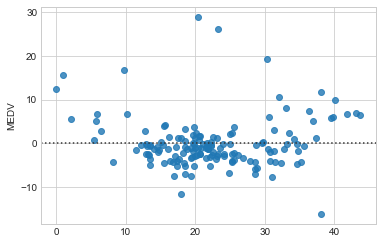

In [122]:
sns.residplot(y_predicted,y_test)

Residual plot shows some shape, a shallow U, suggesting a possibly non-linear relationship for our predictors.

# 7 - Is there synergy among the predictors?
The standard linear regression model assumed as additive relationship between the predictors and response; the effect of each predictor on the response is unrelated to the values of the other predictors.
We can include an interaction term in the regression model in order to accomodate non-additive relationships.

In the above residual plot created for question 6, although presence of non-linearity is present, as there is no funnel shape to the points, there is no evidence for heteroscedasticity (i.e. non-additive relationships).